# Tests

In [1]:
from qibolab.pulses import Pulse, ReadoutPulse, DrivePulse, FluxPulse
from qibolab.pulses import PulseShape, Rectangular, Gaussian, Drag
from qibolab.pulses import PulseType, PulseSequence, SplitPulse
from qibolab.symbolic import intSymbolicExpression as se_int
import numpy as np

### Pulse

Initialisation

In [2]:
# def __init__(self, start:int | intSymbolicExpression, duration:int | intSymbolicExpression, amplitude:float, 
#                    frequency:int, relative_phase:float, shape: PulseShape | str,
#                    channel: int | str, type: PulseType | str  = PulseType.DRIVE, qubit: int | str = 0):

# standard initialisation
p0 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0.0, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p0) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'

# initialisation with Symbolic Expressions
t1 = se_int(100, 't1')
d1 = se_int(50, 'd1')
p1 = Pulse(start = t1, 
           duration = d1, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0.0, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p1) == 'Pulse(100, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'

# initialisation with non int (float) frequency
p2 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20e6, 
           relative_phase = 0, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p2) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'
assert type(p2.frequency) == int and p2.frequency == 20_000_000

# initialisation with non float (int) relative_phase
p3 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 1, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p3) == 'Pulse(0, 50, 0.9, 20_000_000, 1, Rectangular(), 0, PulseType.READOUT)'
assert type(p3.relative_phase) == float and p3.relative_phase == 1.0

# initialisation with str shape
p4 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0, 
           shape = 'Rectangular()', 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p4) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'

# initialisation with str channel and str qubit
p5 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0, 
           shape = 'Rectangular()', 
           channel = 'channel0', 
           type = PulseType.READOUT, 
           qubit = 'qubit0')
assert repr(p5) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), channel0, PulseType.READOUT)'
assert p5.qubit == 'qubit0'

# initialisation with different frequencies, shapes and types
p6 = Pulse(0, 40, 0.9, -50e6, 0, Rectangular(), 0, PulseType.READOUT)
p7 = Pulse(0, 40, 0.9, 0, 0, Rectangular(), 0, PulseType.FLUX)
p8 = Pulse(0, 40, 0.9, 50e6, 0, Gaussian(5), 0, PulseType.DRIVE)
p9 = Pulse(0, 40, 0.9, 50e6, 0, Drag(5,2), 0, PulseType.DRIVE)




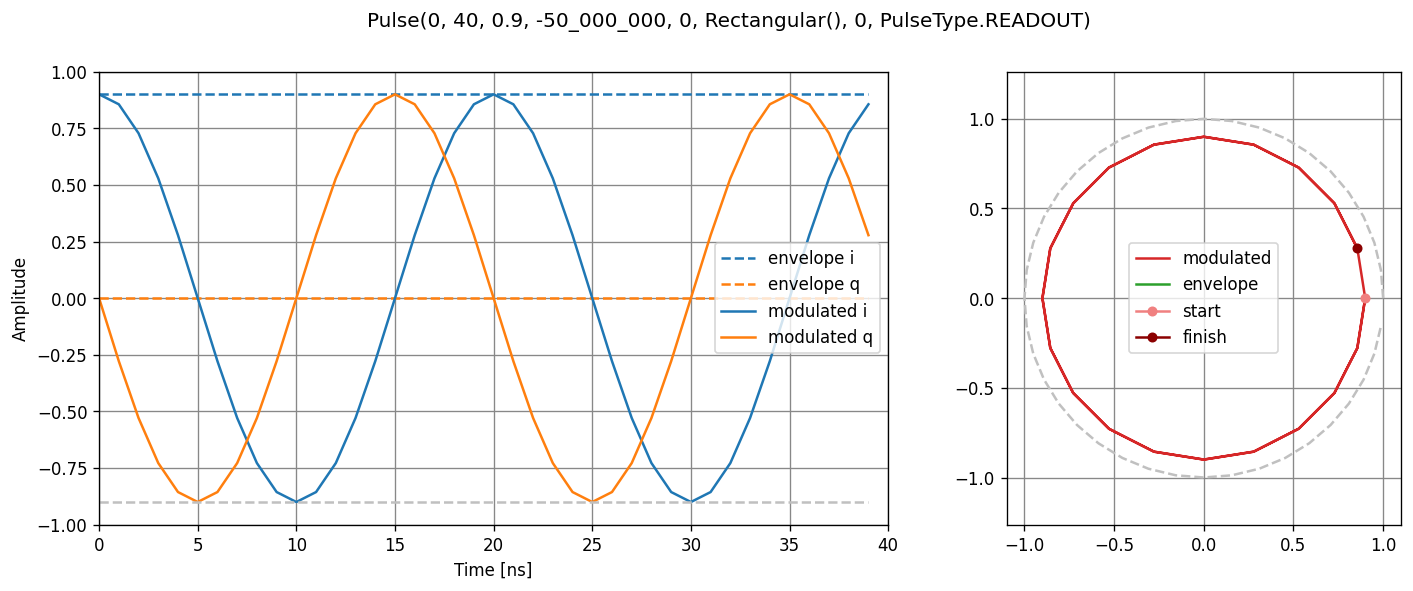

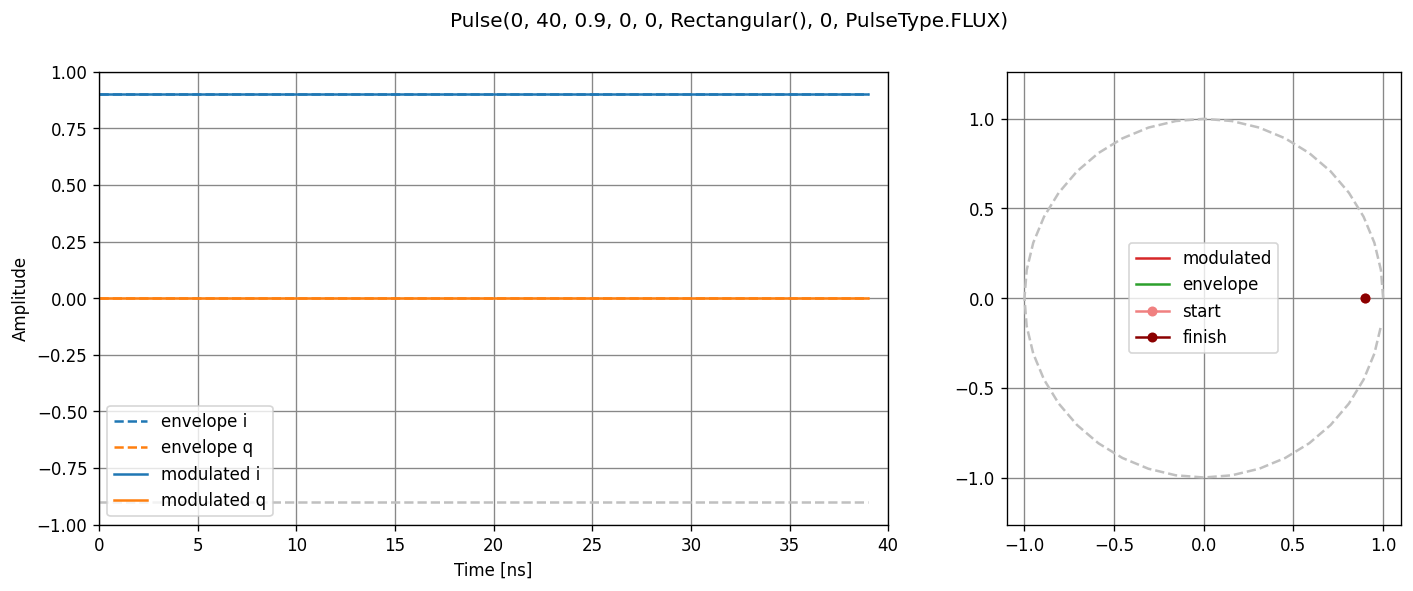

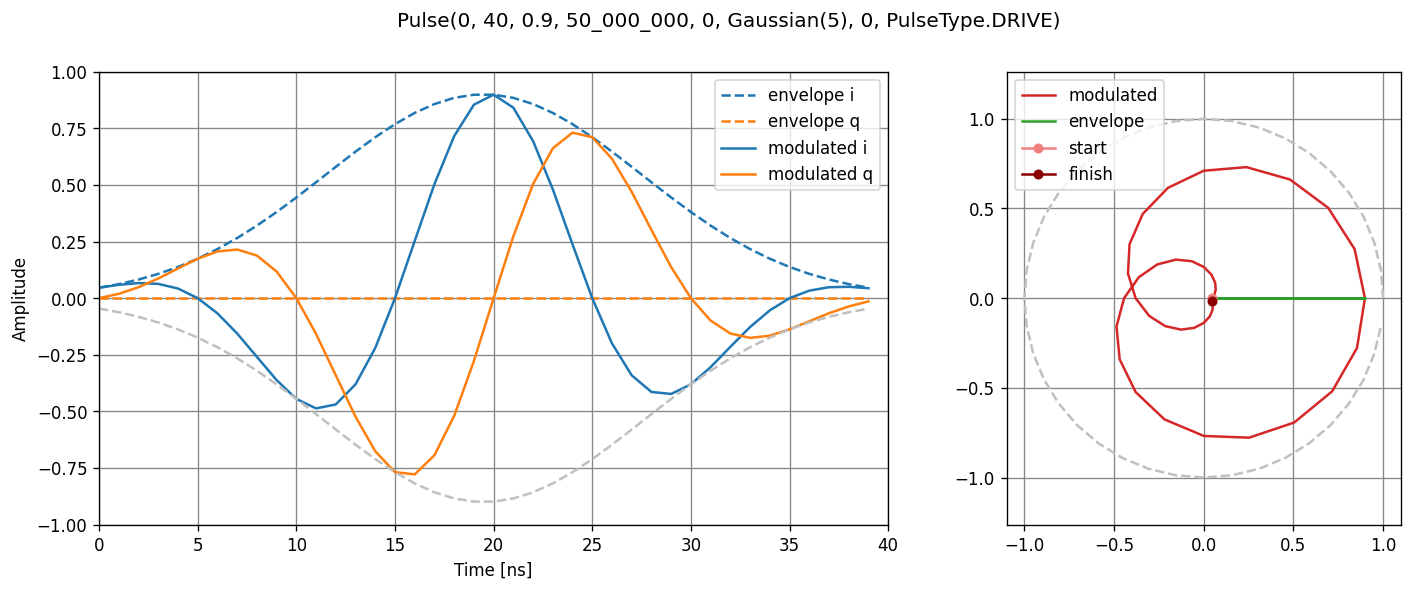

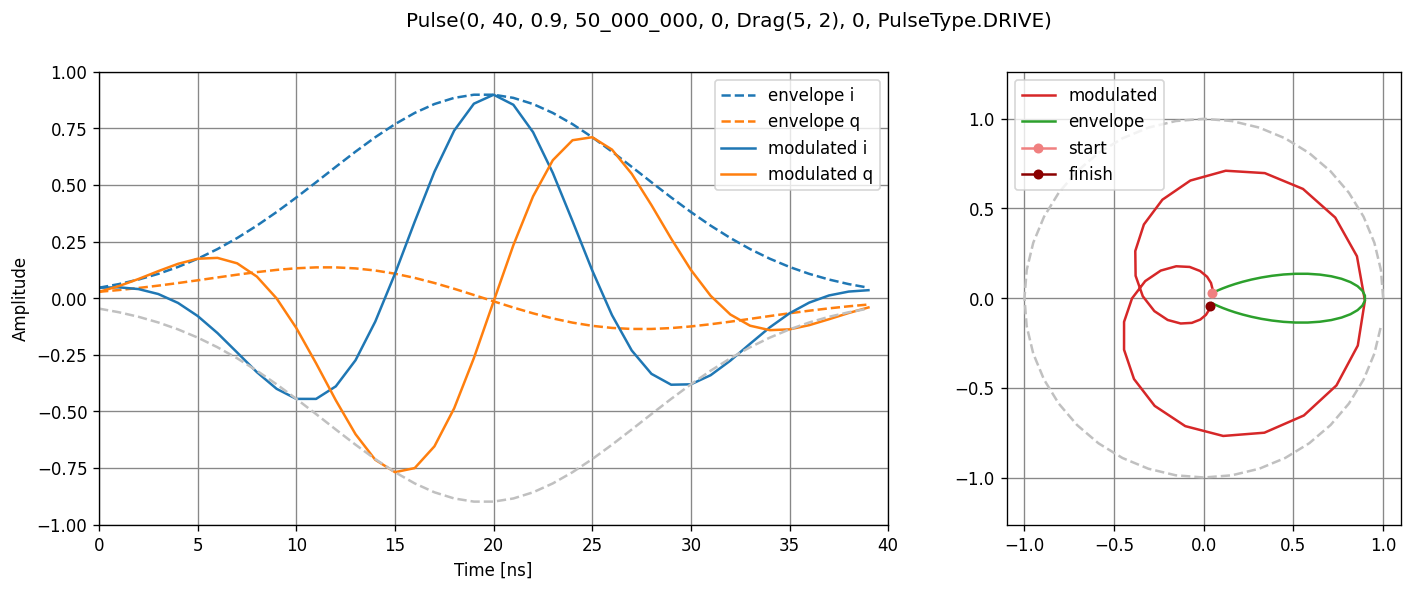

In [3]:
p6.plot()
p7.plot()
p8.plot()
p9.plot()

attributes

In [4]:
channel = 0
qubit = 0

p10 = Pulse(start = 10, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0.0, 
           shape = Rectangular(), 
           channel = channel, 
           type = PulseType.READOUT, 
           qubit = qubit)

assert type(p10.start) == int and p10.start == 10
assert type(p10.duration) == int and p10.duration == 50
assert type(p10.amplitude) == float and p10.amplitude == 0.9
assert type(p10.frequency) == int and p10.frequency == 20_000_000
assert isinstance(p10.shape, PulseShape) and repr(p10.shape) == "Rectangular()"
assert type(p10.channel) == type(channel) and p10.channel == channel
assert type(p10.qubit) == type(qubit) and p10.qubit == qubit
assert type(p10.finish) == int and p10.finish == 60



In [5]:
ValueError_raised = False
try: 
    p10 = Pulse(start = -10, # Start should be >= 0
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

In [6]:
ValueError_raised = False
try: 
    p10 = Pulse(start = 0,
            duration = 0, # duration should be > 0
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

In [7]:
ValueError_raised = False
try: 
    p10 = Pulse(start = 0,
            duration = 50, 
            amplitude = 1.1, # amplitude should be >= 0 & <= 1
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

In [8]:
ValueError_raised = False
try: 
    p10 = Pulse(start = 0,
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = 'NonImplementedShape()', 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

serial

In [9]:
p11 = Pulse(0, 40, 0.9, 50_000_000, 0, Gaussian(5), 0, PulseType.DRIVE)
assert p11.serial == 'Pulse(0, 40, 0.9, 50_000_000, 0, Gaussian(5), 0, PulseType.DRIVE)'
assert repr(p11) == p11.serial

Sampling Rate

In [10]:
p12 = Pulse(0, 40, 0.9, 100e6, 0, Rectangular(), 0, PulseType.DRIVE)
p13 = Pulse(0, 40, 0.9, 100e6, 0, Gaussian(5), 0, PulseType.DRIVE)
p14 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)

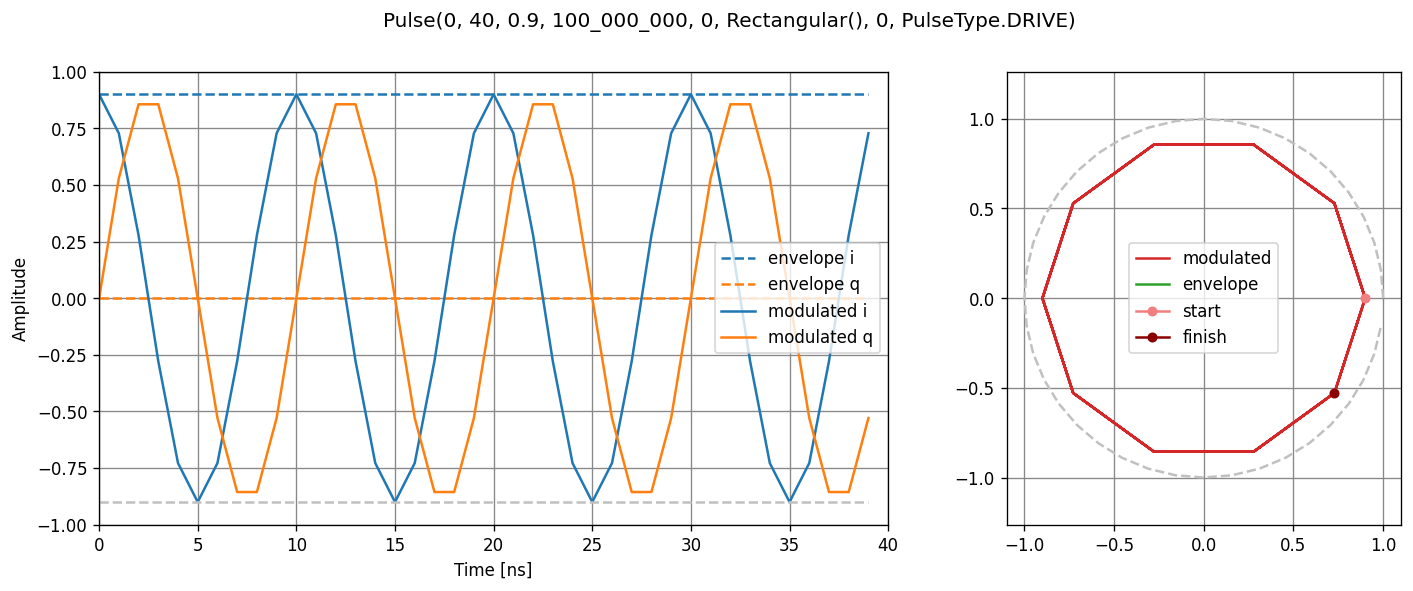

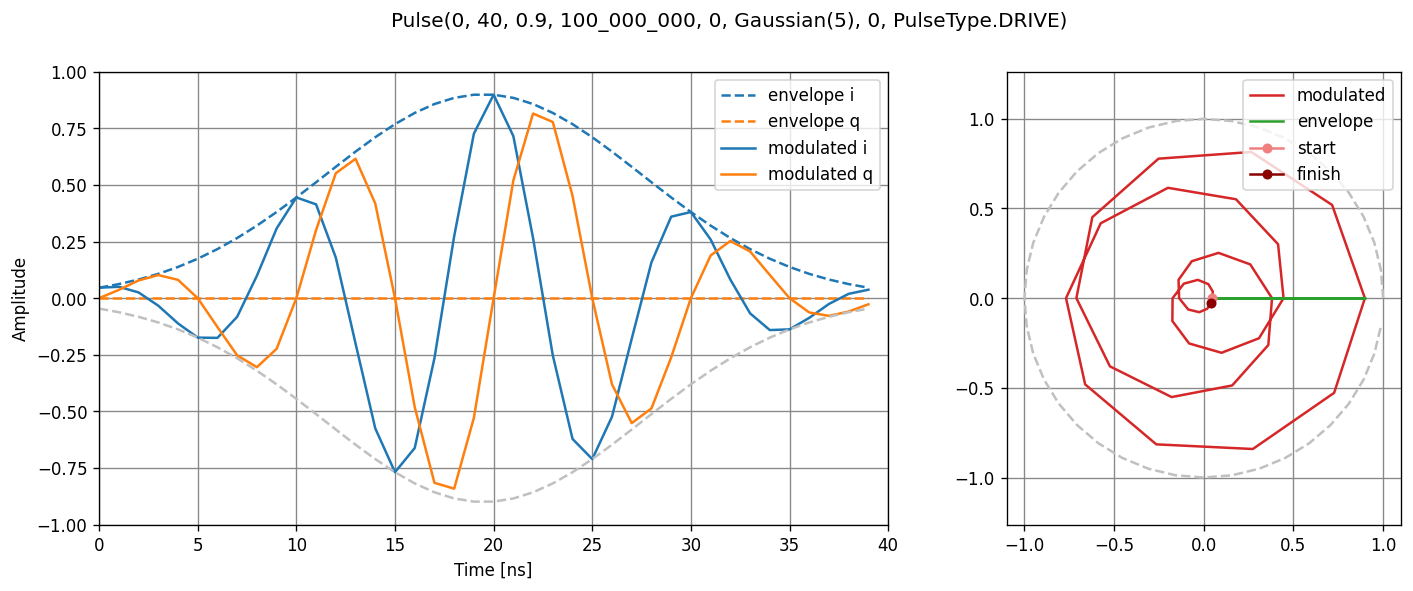

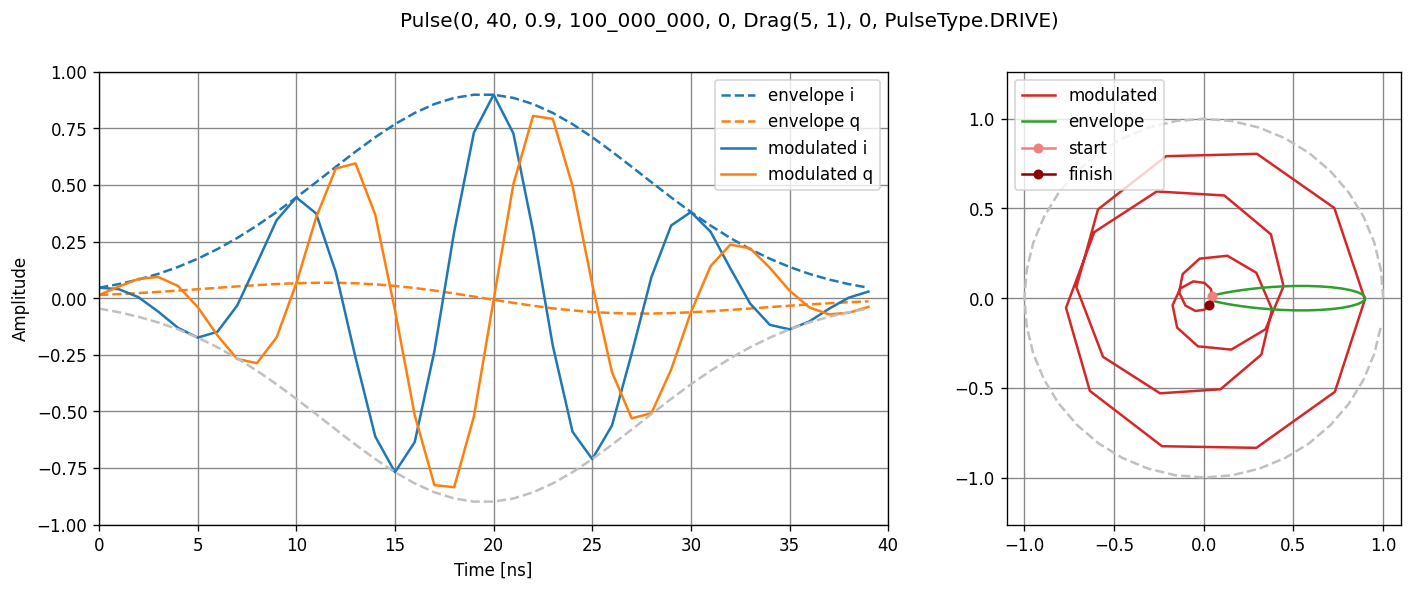

In [11]:
tmp = PulseShape.SAMPLING_RATE
PulseShape.SAMPLING_RATE = 1e9
p12.plot()
p13.plot()
p14.plot()
PulseShape.SAMPLING_RATE = tmp

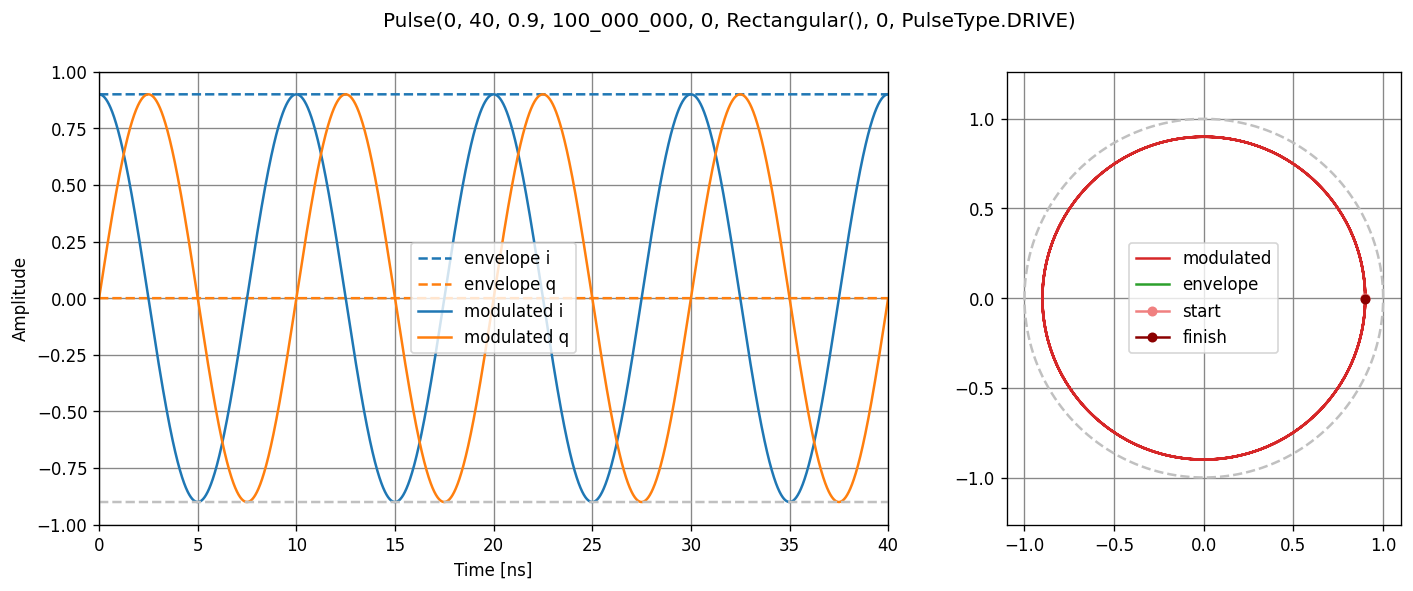

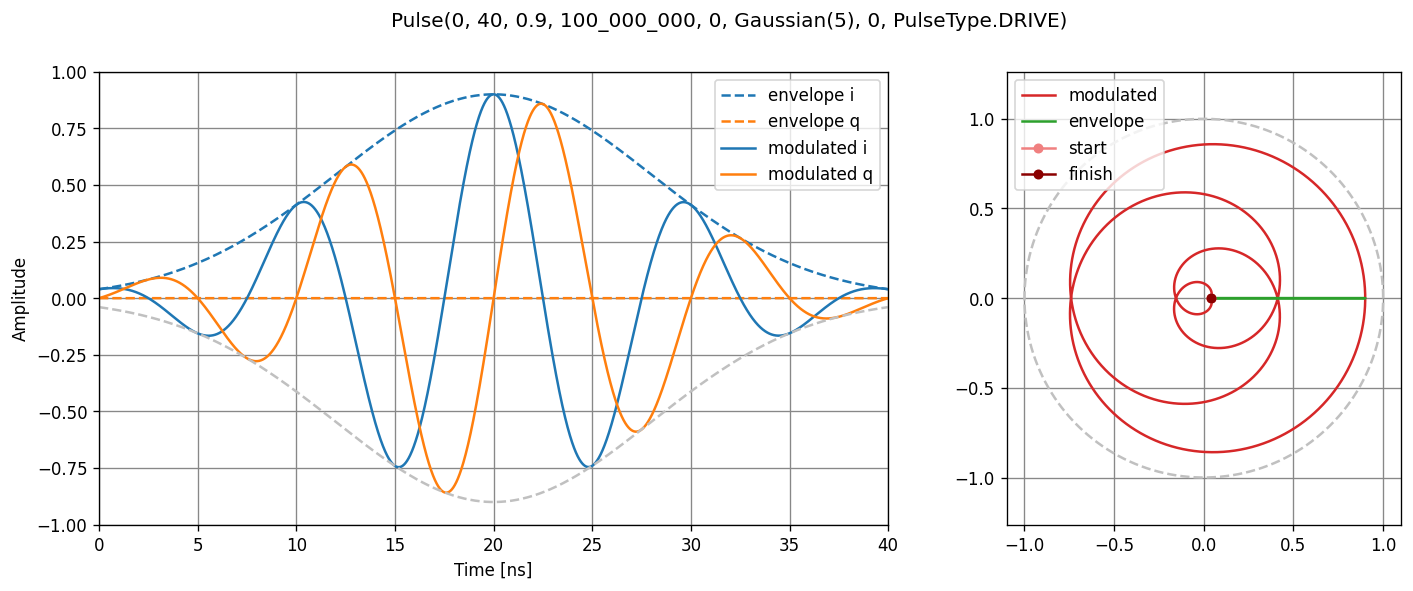

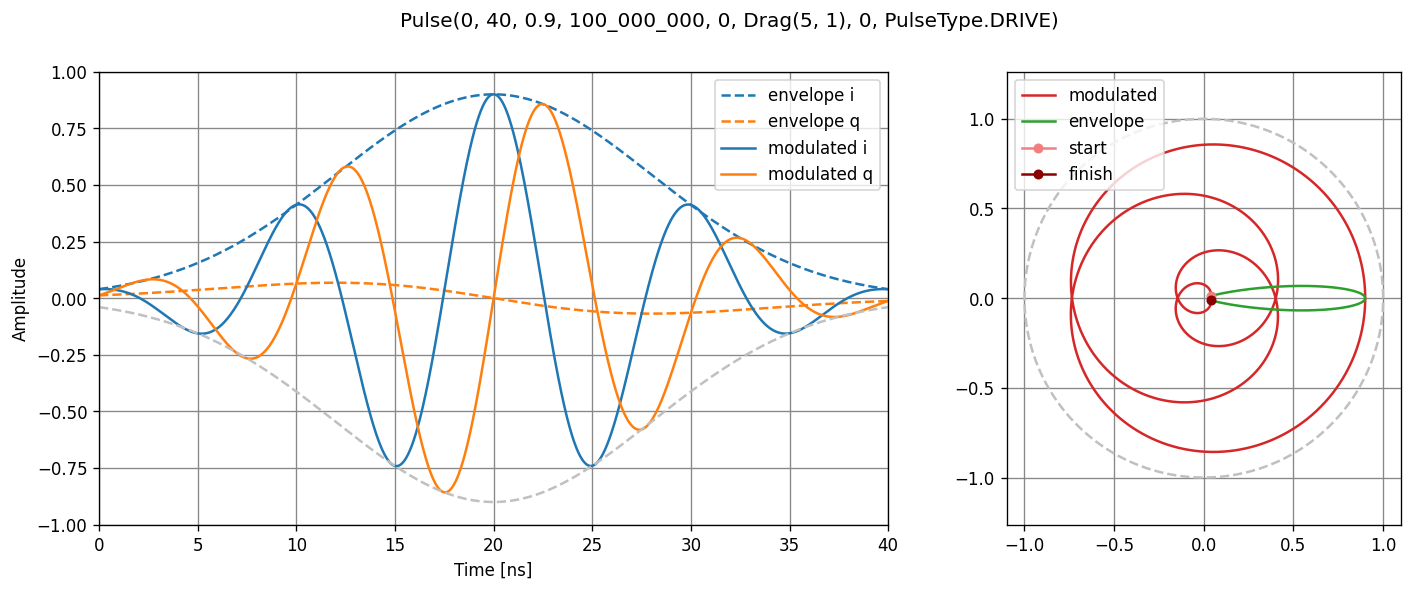

In [12]:
tmp = PulseShape.SAMPLING_RATE
PulseShape.SAMPLING_RATE = 100e9
p12.plot()
p13.plot()
p14.plot()
PulseShape.SAMPLING_RATE = tmp

Drag Shape

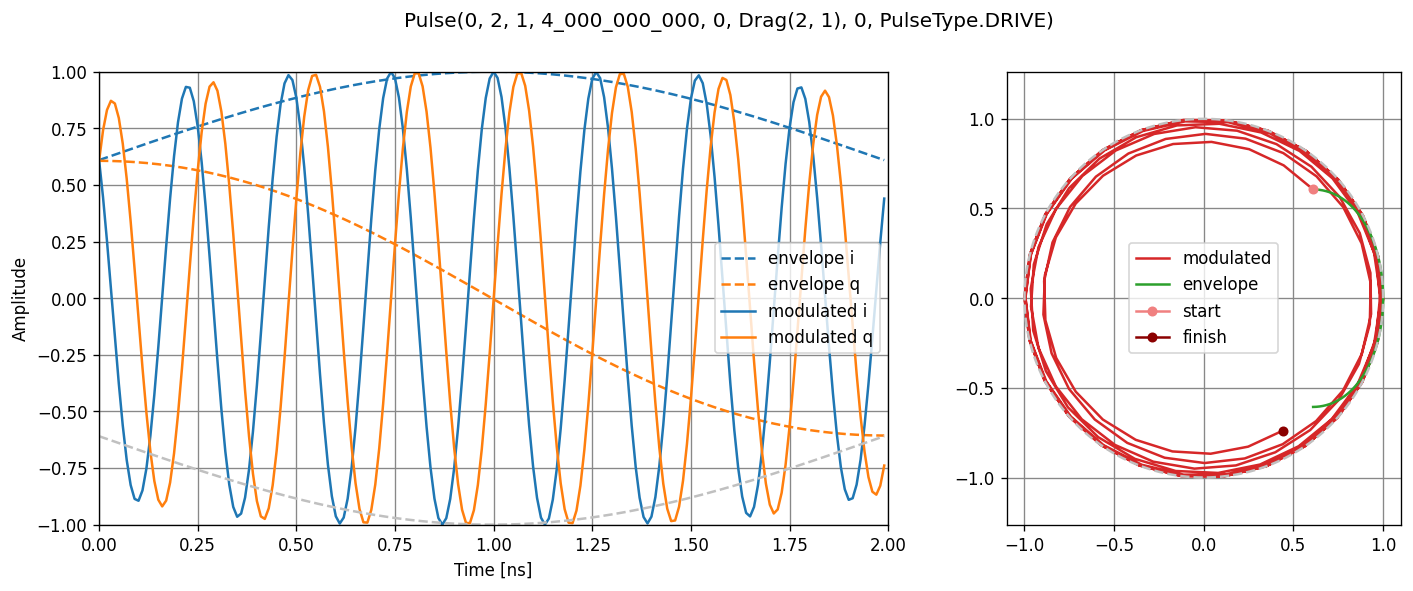

In [13]:
tmp = PulseShape.SAMPLING_RATE
dp = Pulse(0, 2, 1, 4e9, 0, Drag(2,1), 0, PulseType.DRIVE)
PulseShape.SAMPLING_RATE = 100e9
dp.plot()
PulseShape.SAMPLING_RATE = tmp
# envelope i & envelope q should cross nearly at 0 and at 2

hash

In [14]:
rp = Pulse(0, 40, 0.9, 100e6, 0, Rectangular(), 0, PulseType.DRIVE)
dp = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
hash(rp)
my_dict = {rp: 1, dp: 2}
assert list(my_dict.keys())[0] == rp
assert list(my_dict.keys())[1] == dp

In [15]:
p1 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)

assert p1 == p2

In [16]:
t0 = se_int(0, 't0')
t1 = se_int(0, 't1')
p1 = Pulse(t0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = Pulse(t1, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
assert p1 == p2
t0 +=100
assert p1 != p2

deep_copy and shallow_copy

In [17]:
t0 = se_int(0, 't0')
p1 = Pulse(t0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = p1.shallow_copy()
p3 = p1.deep_copy()
assert p1 == p2
assert p1 == p3
t0 +=100
assert p1 == p2
assert p1 != p3


ReadoutPulse, DrivePulse & FluxPulse Aliases

In [18]:
rop = ReadoutPulse(start = 0,
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            qubit = 0)
assert repr(rop) == 'ReadoutPulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0)'

dp = DrivePulse(start = 0,
            duration = 2000, 
            amplitude = 0.9, 
            frequency = 200_000_000, 
            relative_phase = 0.0, 
            shape = Gaussian(5), 
            channel = 0, 
            qubit = 0)
assert repr(dp) == 'DrivePulse(0, 2000, 0.9, 200_000_000, 0, Gaussian(5), 0)'

fp = FluxPulse(start = 0,
            duration = 300, 
            amplitude = 0.9, 
            frequency = 0.0, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            qubit = 0)
assert repr(fp) == 'FluxPulse(0, 300, 0.9, 0, 0, Rectangular(), 0)'



SplitPulse

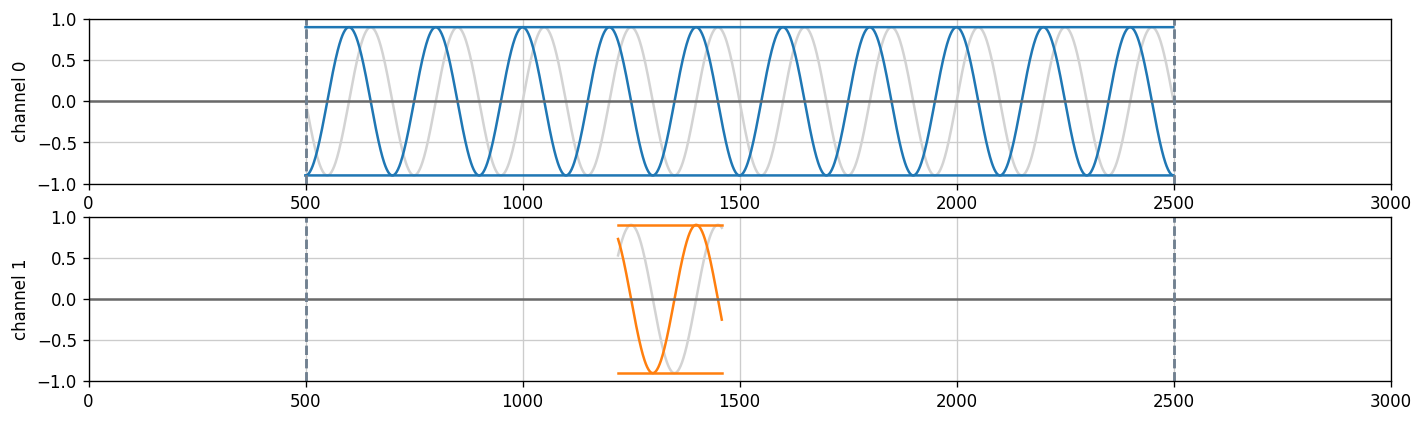

In [19]:
dp = Pulse(start = 500,
            duration = 2000, 
            amplitude = 0.9, 
            frequency = 5_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            type = PulseType.READOUT,
            qubit = 0)

sp = SplitPulse(dp)
sp.channel = 1
a = 720
b = 960
sp.window_start = sp.start + a
sp.window_finish = sp.start + b
assert sp.window_start == sp.start + a
assert sp.window_finish == sp.start + b
ps = PulseSequence(dp, sp)
ps.plot()
assert len(sp.envelope_waveform_i) == b - a
assert len(sp.envelope_waveform_q) == b - a
assert len(sp.modulated_waveform_i) == b - a
assert len(sp.modulated_waveform_q) == b - a

### Pulse Sequence

Initialisation

In [20]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(500, 40, 0.9, 100e6, 0, Drag(5,1), 2, PulseType.DRIVE)
p3 = Pulse(400, 40, 0.9, 100e6, 0, Drag(5,1), 3, PulseType.DRIVE)

In [21]:
ps = PulseSequence()
assert type(ps) == PulseSequence

In [22]:
ps = PulseSequence(p1, p2, p3)
assert ps.count == 3 and len(ps) ==3
assert ps[0] == p1
assert ps[1] == p2
assert ps[2] == p3


In [23]:
other_ps = p1 + p2 + p3
assert other_ps.count == 3 and len(other_ps) ==3
assert other_ps[0] == p1
assert other_ps[1] == p2
assert other_ps[2] == p3

In [24]:
plist = [p1, p2, p3]
n = 0
for pulse in ps:
    assert plist[n] == pulse
    n += 1

In [25]:
p4 = Pulse(300, 40, 0.9, 50e6, 0, Gaussian(5), 1, PulseType.DRIVE)
p5 = Pulse(200, 40, 0.9, 50e6, 0, Gaussian(5), 2, PulseType.DRIVE)
p6 = Pulse(100, 40, 0.9, 50e6, 0, Gaussian(5), 3, PulseType.DRIVE)
yet_another_ps = PulseSequence()
yet_another_ps.add(p4)
yet_another_ps.add(p5, p6)
assert yet_another_ps[0] == p4
assert yet_another_ps[1] == p5
assert yet_another_ps[2] == p6

In [26]:
ps += yet_another_ps
assert ps.count == 6
ps += ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 1)
ps = ps + ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 2)
ps = ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 3) + ps
assert ps.count == 9
print(ps)

PulseSequence
Pulse(300, 40, 0.9, 50_000_000, 0, Gaussian(5), 1, PulseType.DRIVE)
Pulse(600, 40, 0.9, 100_000_000, 0, Drag(5, 1), 1, PulseType.DRIVE)
ReadoutPulse(800, 200, 0.9, 20_000_000, 0, Rectangular(), 1)
Pulse(200, 40, 0.9, 50_000_000, 0, Gaussian(5), 2, PulseType.DRIVE)
Pulse(500, 40, 0.9, 100_000_000, 0, Drag(5, 1), 2, PulseType.DRIVE)
ReadoutPulse(800, 200, 0.9, 20_000_000, 0, Rectangular(), 2)
Pulse(100, 40, 0.9, 50_000_000, 0, Gaussian(5), 3, PulseType.DRIVE)
Pulse(400, 40, 0.9, 100_000_000, 0, Drag(5, 1), 3, PulseType.DRIVE)
ReadoutPulse(800, 200, 0.9, 20_000_000, 0, Rectangular(), 3)


In [27]:
assert p5 in ps

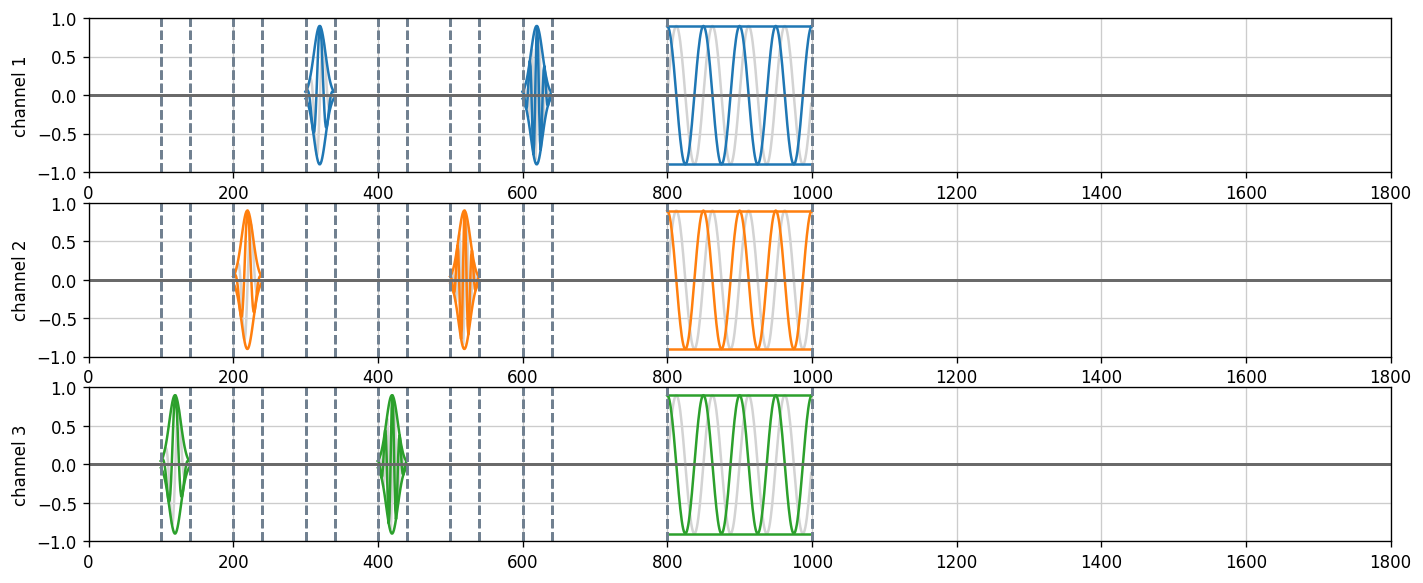

In [28]:
ps.plot()

In [29]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
ps = PulseSequence(p1)
assert ps.count == 1
ps *= 3
assert ps.count == 3
ps *= 3
assert ps.count == 9

In [3]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 2, PulseType.DRIVE)
ps = 2 * p2 + p1 * 3
assert ps.count == 5

In [12]:
ps.clear()
assert ps.count == 0
assert ps.is_empty

In [13]:
p1 = Pulse(20, 40, 0.9, 200e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(60, 1000, 0.9, 20e6, 0, Rectangular(), 2, PulseType.READOUT)
ps = p1 + p2
assert ps.start == p1.start
assert ps.finish == p2.start + p2.finish


In [14]:
p1 = DrivePulse(0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(100, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(300, 400, 0.9, 20e6, 0, Drag(5,50), 20)
p4 = DrivePulse(400, 400, 0.9, 20e6, 0, Drag(5,50), 30)
p5 = ReadoutPulse(500, 400, 0.9, 20e6, 0, Rectangular(), 20)
p6 = DrivePulse(600, 400, 0.9, 20e6, 0, Gaussian(5), 30)

ps = PulseSequence(p1, p2, p3, p4, p5, p6)
assert ps.channels == [10, 20, 30]
assert ps.get_channel_pulses(10).count == 1 
assert ps.get_channel_pulses(20).count == 2 
assert ps.get_channel_pulses(30).count == 3 

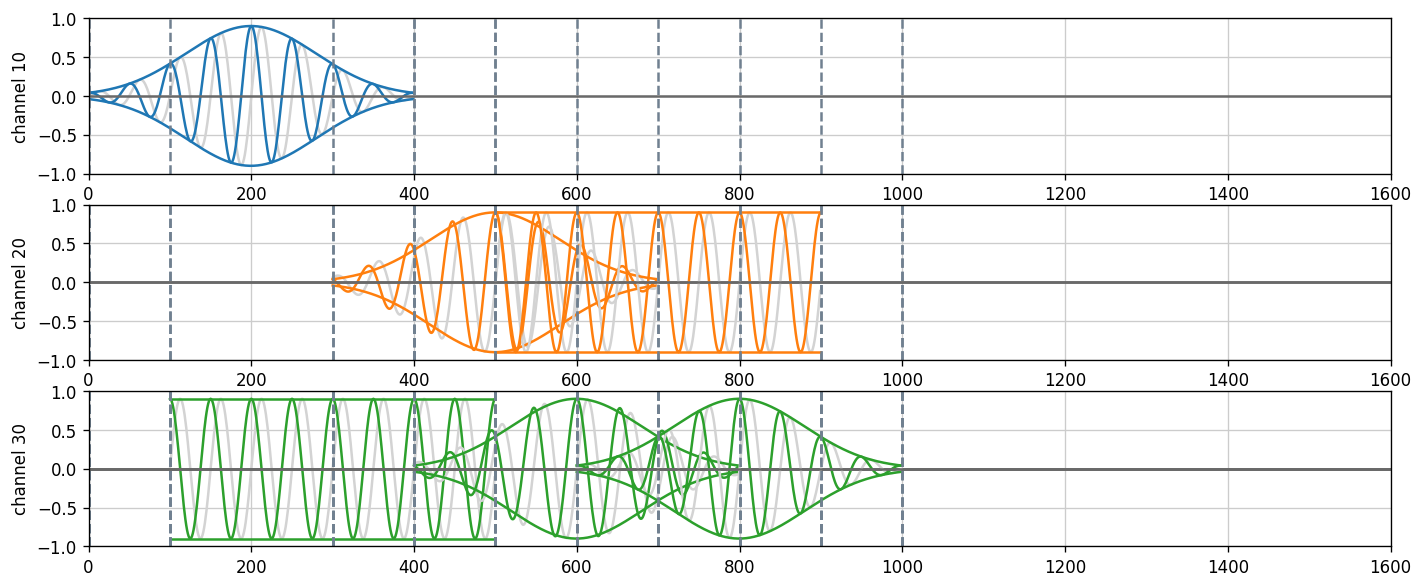

In [15]:
ps.plot()

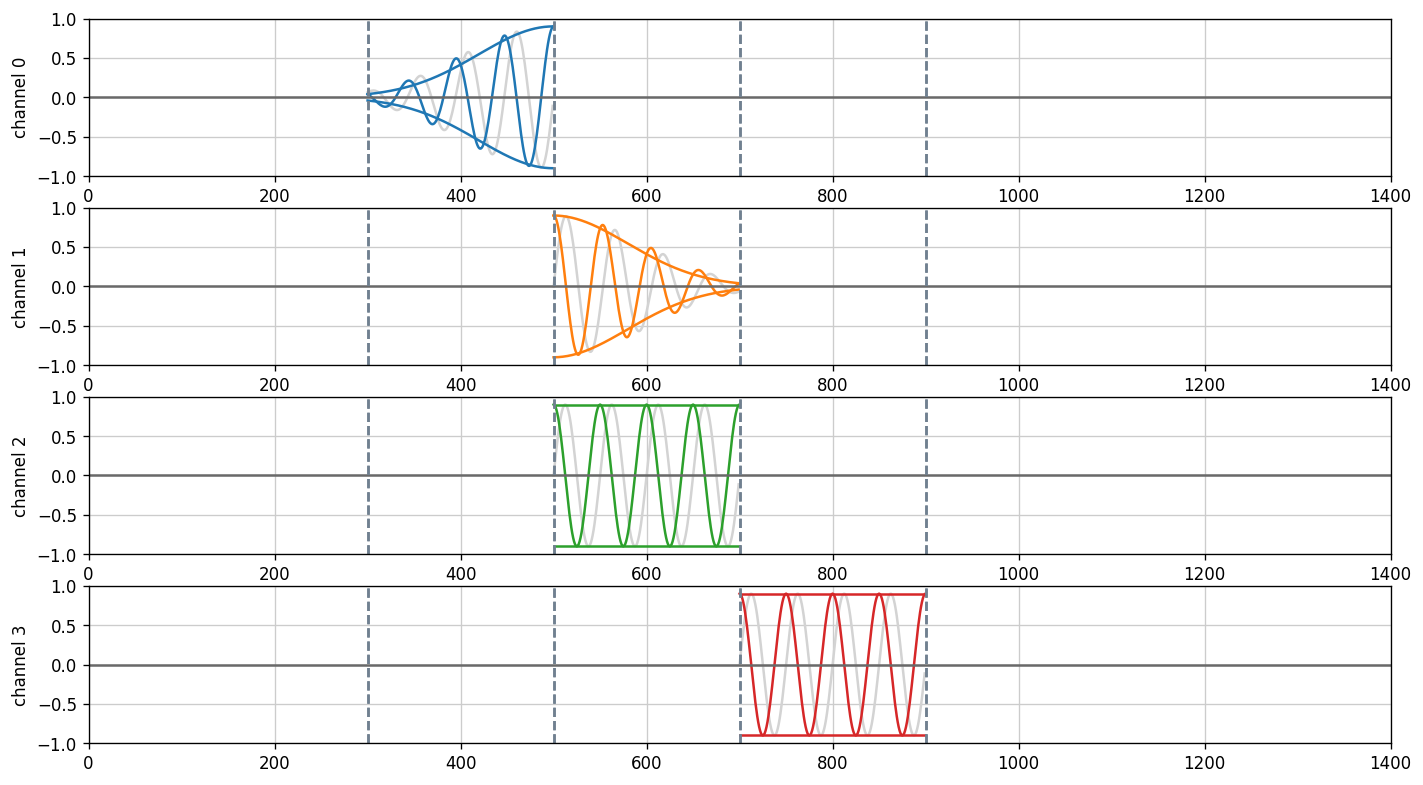

In [16]:
assert ps.pulses_overlap == True
assert ps.get_channel_pulses(10).pulses_overlap == False
assert ps.get_channel_pulses(20).pulses_overlap == True
assert ps.get_channel_pulses(30).pulses_overlap == True

channel10_ps = ps.get_channel_pulses(10)
channel20_ps = ps.get_channel_pulses(20)
channel30_ps = ps.get_channel_pulses(30)

split_pulses = PulseSequence()
overlaps = channel20_ps.get_pulse_overlaps()
n = 0
for section in overlaps.keys():
    for pulse in overlaps[section]:
        sp = SplitPulse(pulse, section[0], section[1])
        sp.channel = n
        split_pulses.add(sp)
        n += 1
split_pulses.plot()



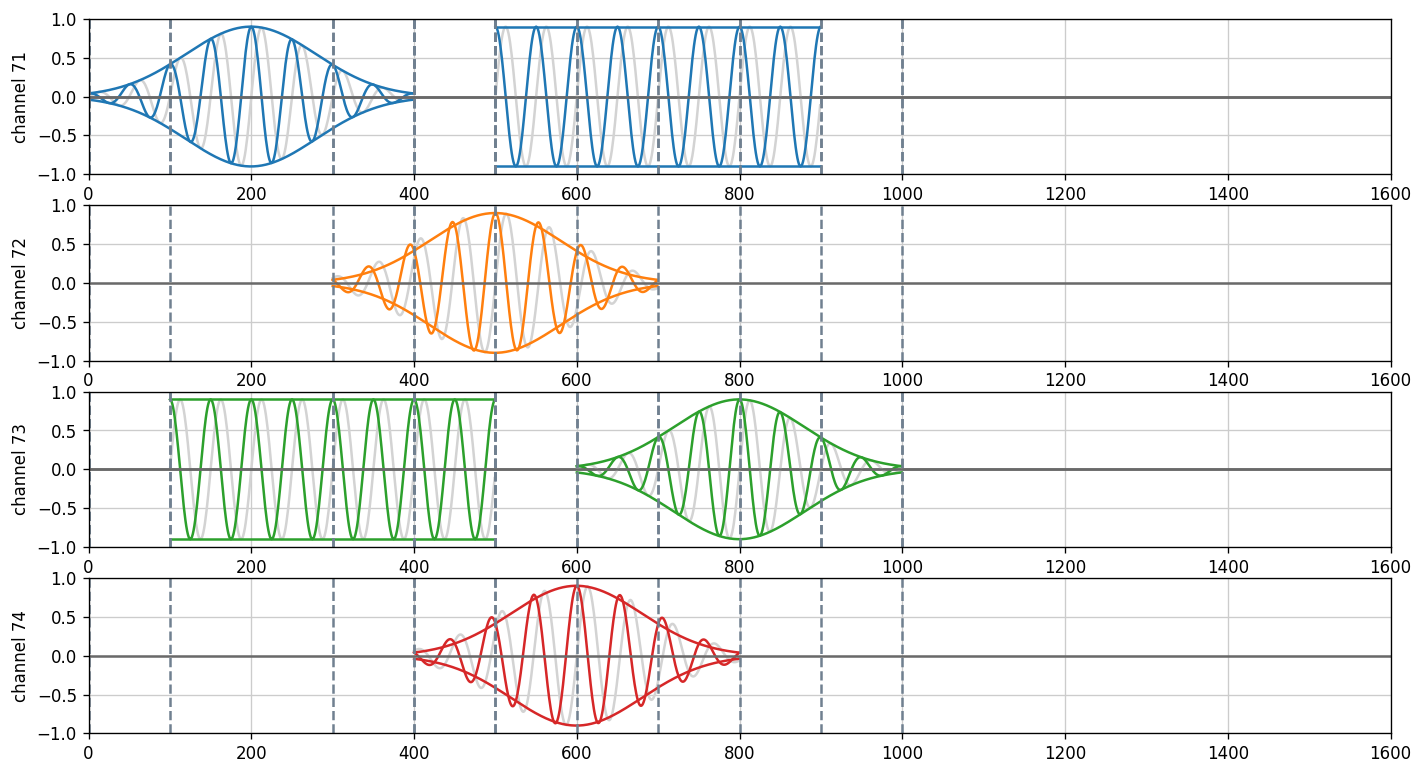

In [17]:
n = 70
for segregated_ps in ps.separate_overlapping_pulses():
    n +=1
    for pulse in segregated_ps:
        pulse.channel = n
ps.plot()

In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t0 = se_int(0)
t = se_int(0)
p1 = DrivePulse(t0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(p1.tv_finish + t, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(p2.tv_finish, 400, 0.9, 20e6, 0, Drag(5,50), 20)
ps = p1 + p2 + p3

@widgets.interact(start=(0, 1000, 100), t_between=(0, 1000, 100))
def update(start = 0, t_between = 0):
    t.value = t_between
    t0.value = start
    ps.plot()

NameError: name 'int_se' is not defined

In [37]:
p1 = DrivePulse(t0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(p1.tv_finish + t, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(p2.tv_finish, 400, 0.9, 20e6, 0, Drag(5,50), 20)
ps1 = p1 + p2 + p3
ps2 = p3 + p1 + p2
assert ps1 == ps2

In [38]:
hash(ps1)

11695592411780721

In [39]:
hash(ps2)

11695592411780721

In [40]:
for pulse in ps1.pulses:
    print(pulse.serial)

DrivePulse(0, 400, 0.9, 20_000_000, 0, Gaussian(5), 10)
DrivePulse(800, 400, 0.9, 20_000_000, 0, Drag(5, 50), 20)
ReadoutPulse(400, 400, 0.9, 20_000_000, 0, Rectangular(), 30)


In [41]:
for pulse in ps2.pulses:
    print(pulse.serial)

DrivePulse(0, 400, 0.9, 20_000_000, 0, Gaussian(5), 10)
DrivePulse(800, 400, 0.9, 20_000_000, 0, Drag(5, 50), 20)
ReadoutPulse(400, 400, 0.9, 20_000_000, 0, Rectangular(), 30)


In [42]:
t0.value = 100

In [43]:
overlaps

{(300,
  500): PulseSequence
 DrivePulse(300, 400, 0.9, 20_000_000, 0, Drag(5, 50), 20),
 (500,
  700): PulseSequence
 DrivePulse(300, 400, 0.9, 20_000_000, 0, Drag(5, 50), 20)
 ReadoutPulse(500, 400, 0.9, 20_000_000, 0, Rectangular(), 20),
 (700,
  900): PulseSequence
 ReadoutPulse(500, 400, 0.9, 20_000_000, 0, Rectangular(), 20)}